In [ ]:
Q1.Import the dataset and examine the variables. Use descriptive statistics and visualizations to 
understand the distribution and relationships between the variables 

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('diabetes.csv')

In [5]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [6]:
print(data.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [7]:
print(data.describe())


       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

In [8]:
print(data.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


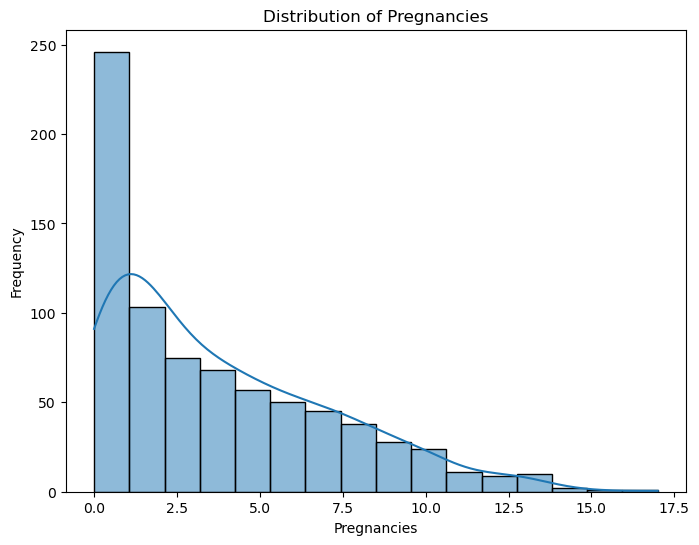

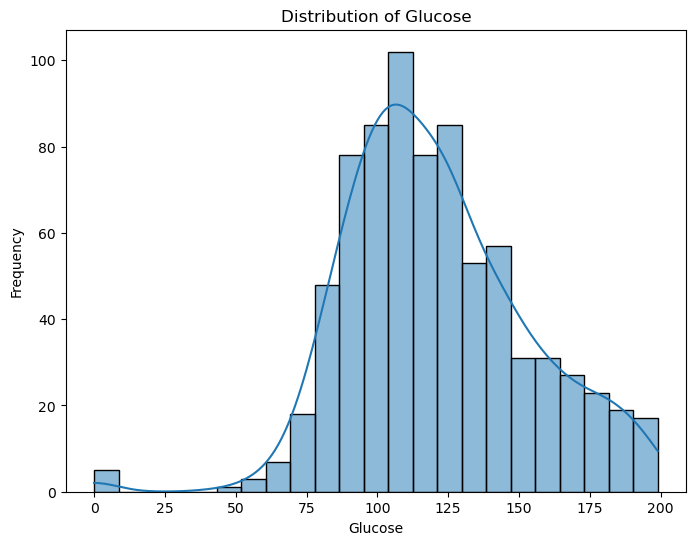

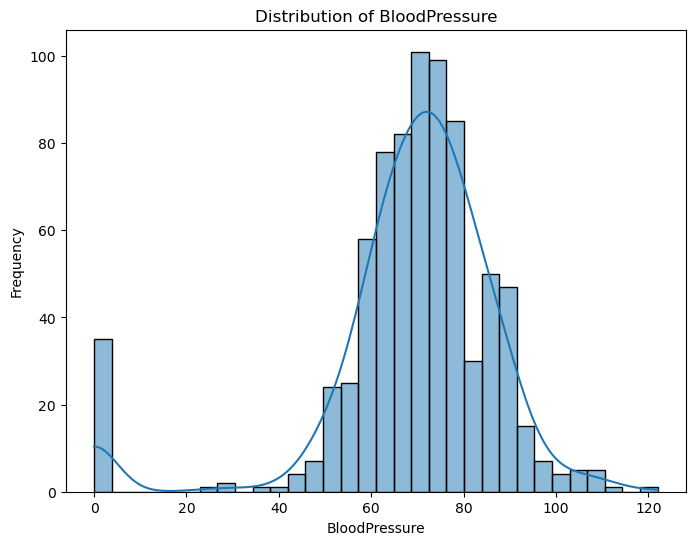

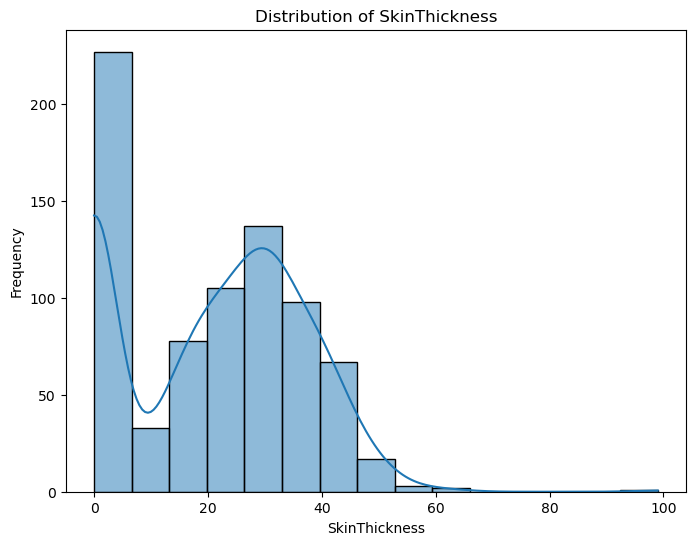

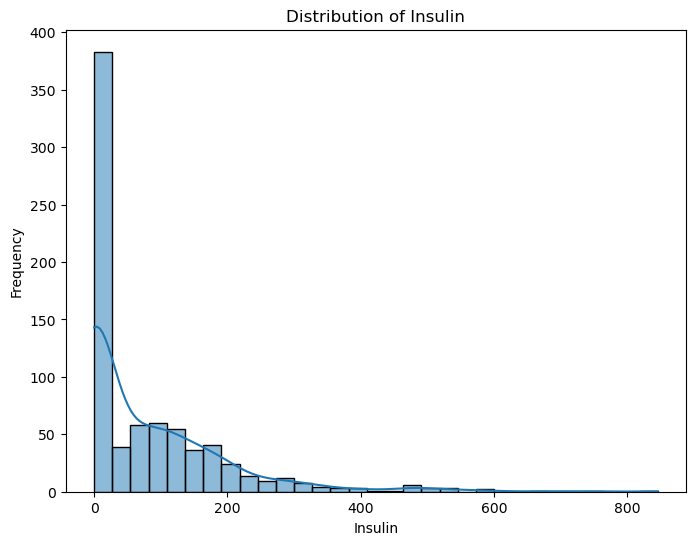

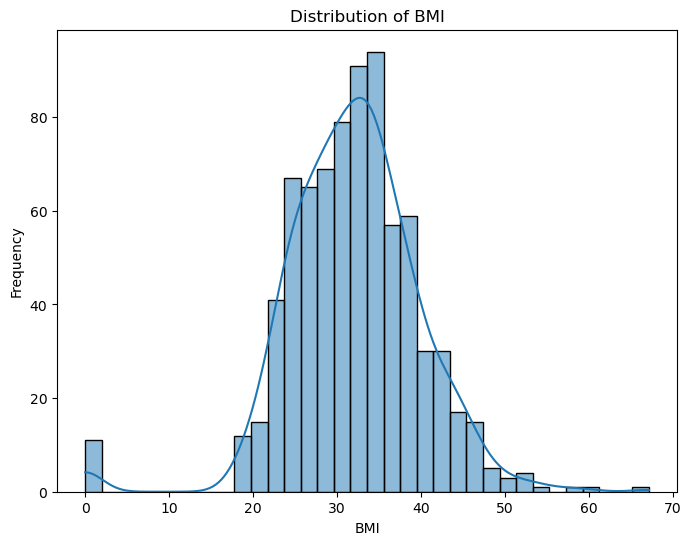

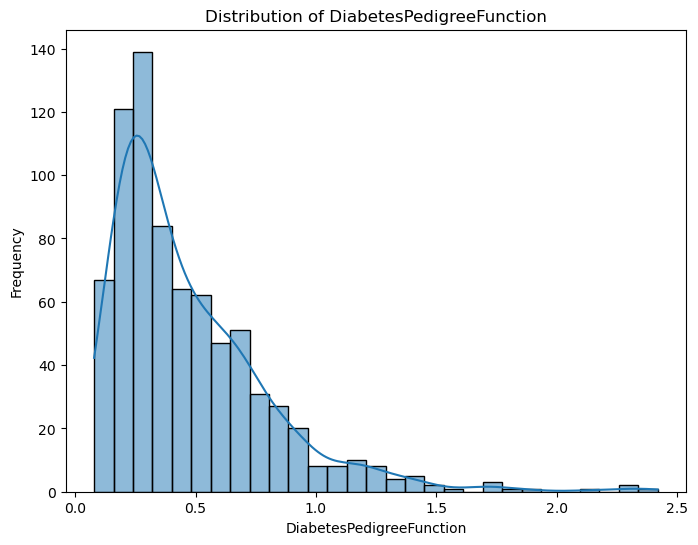

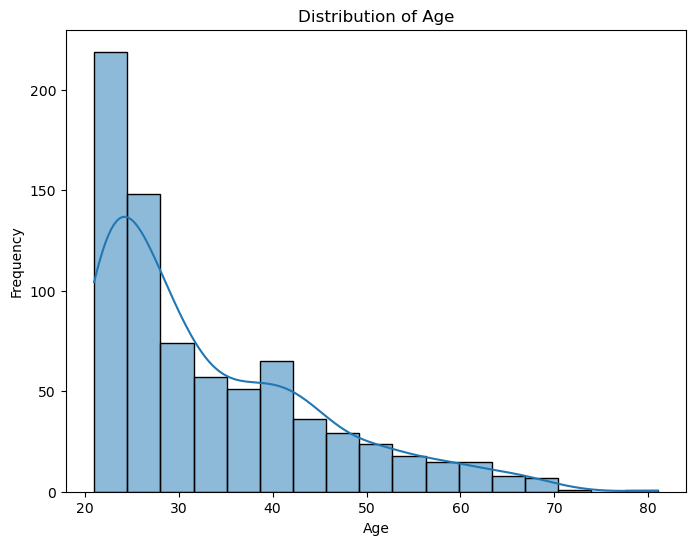

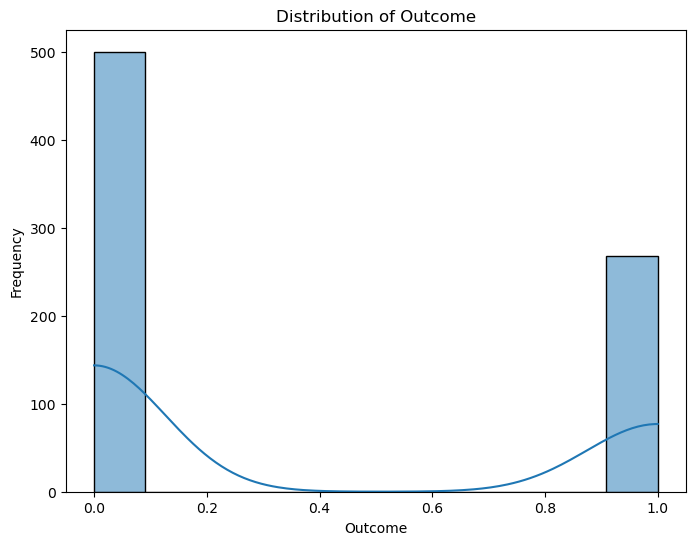

In [9]:
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

In [16]:
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(data[col])
    plt.title(f'Countplot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

NameError: name 'data' is not defined

In [ ]:
sns.pairplot(data[numeric_columns])
plt.show()

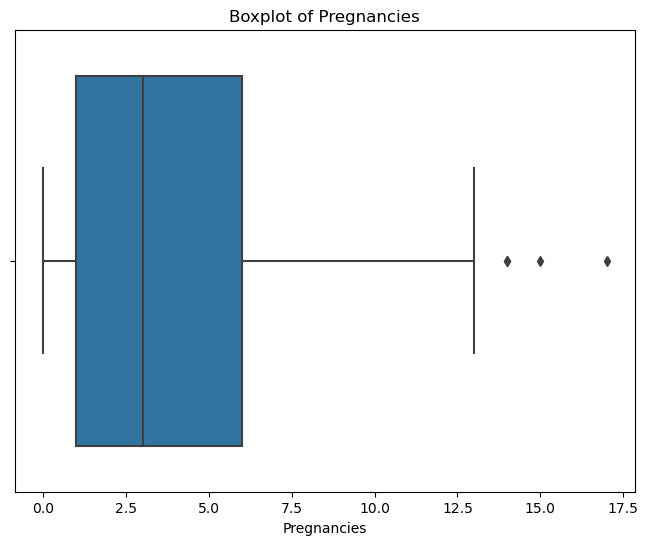

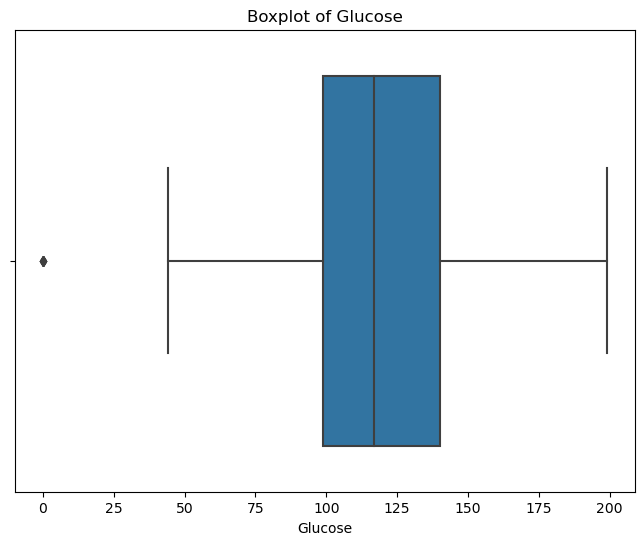

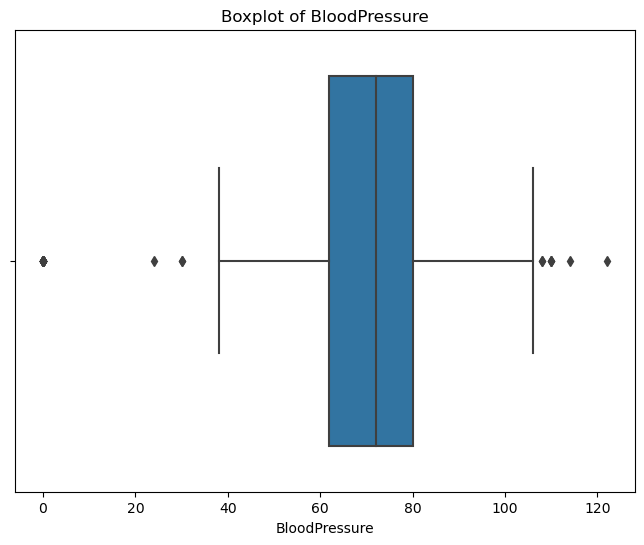

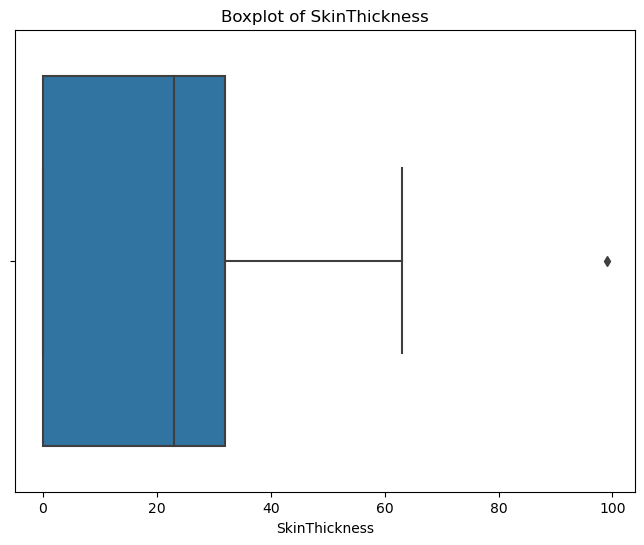

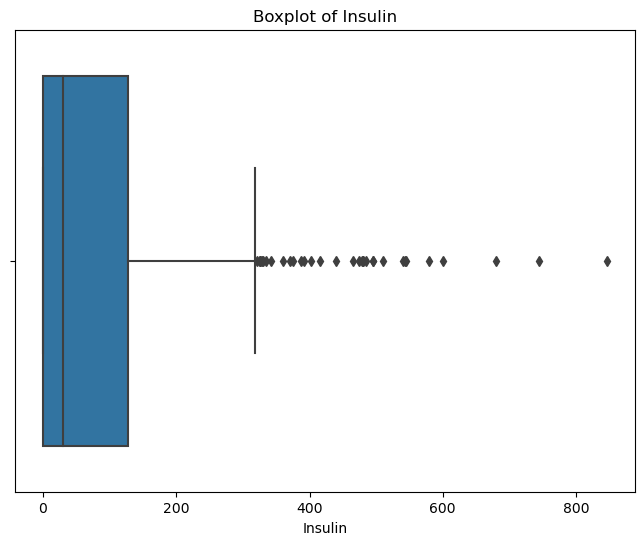

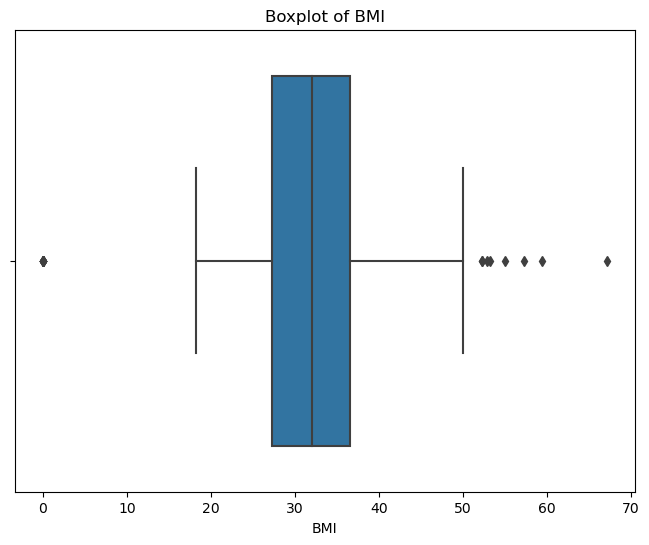

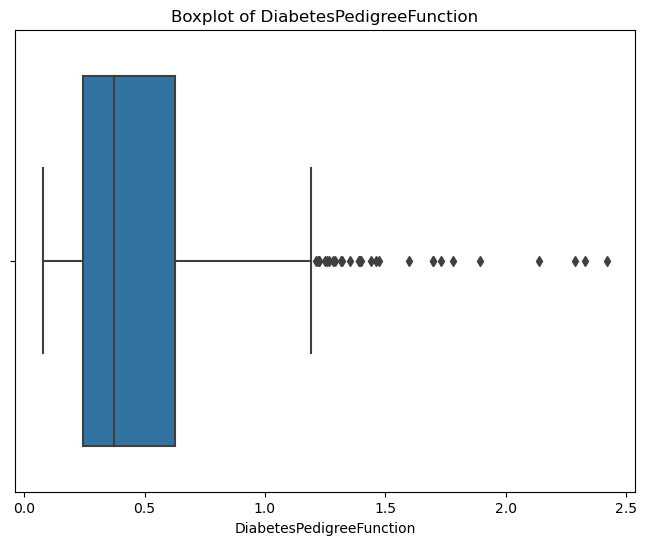

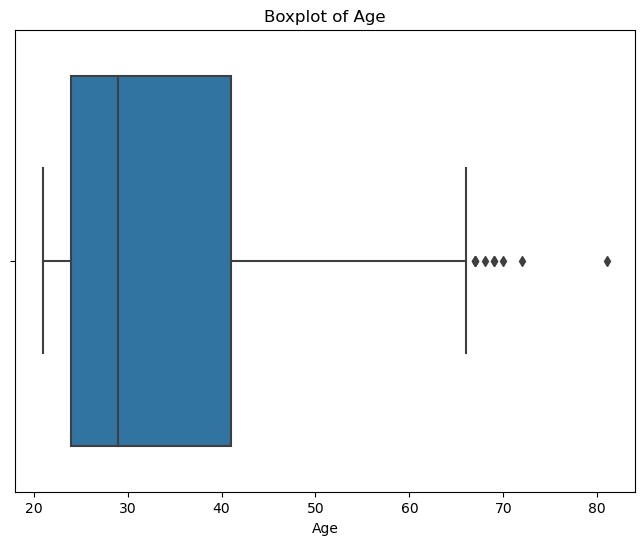

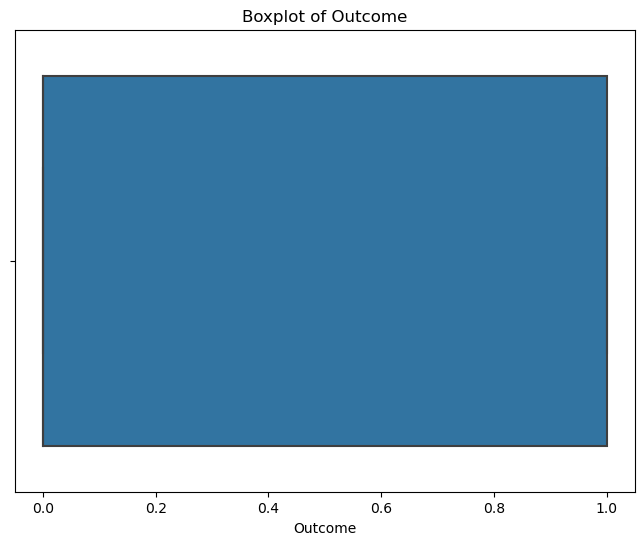

In [14]:
 for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=column, data=data)
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.show()


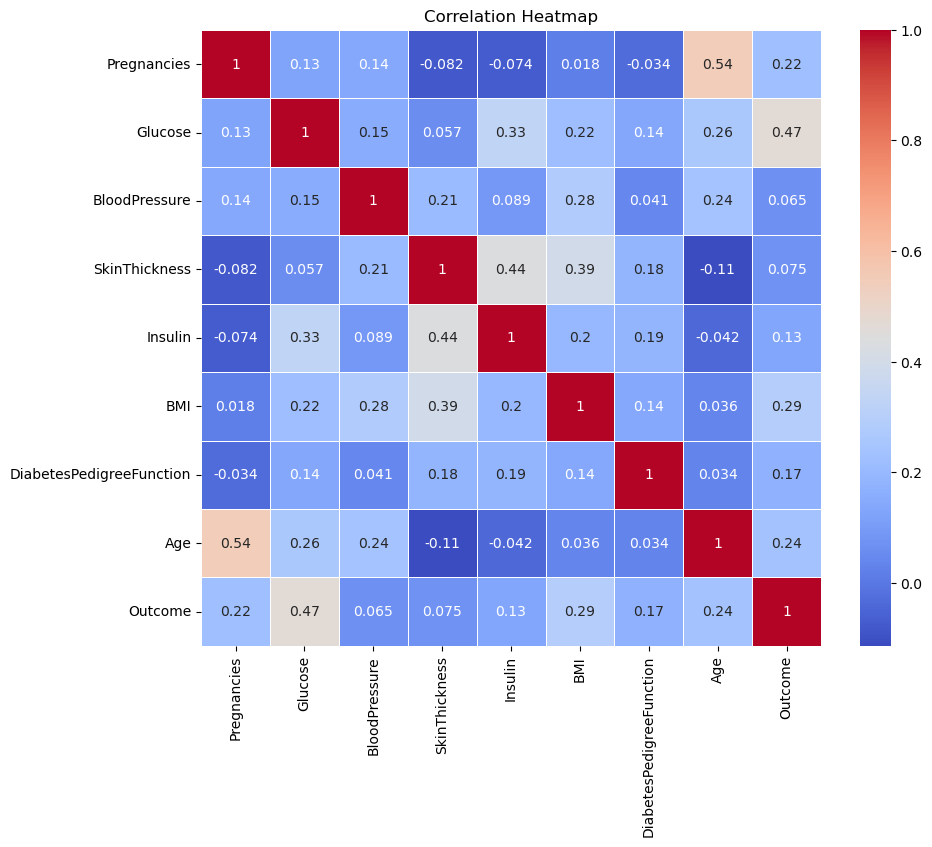

In [15]:
 ##Correlation heatmap to visualize relationships between numeric variables
correlation_matrix = data[numeric_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [17]:
 ## Bar plot to visualize categorical variables
    
categorical_columns = data.select_dtypes(include=['object']).columns
for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=data, x=column)
    plt.title(f'Countplot of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

In [ ]:
Q2.  Preprocess the data by cleaning missing values, removing outliers, and transforming categorical 
variables into dummy variables if necessary.


In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


df = pd.read_csv('diabetes.csv')



In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df.fillna(df.mean(), inplace=True)

In [5]:
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

In [6]:
 missing_percentage = 0.1  # Adjust as needed
rng = np.random.default_rng(seed=42)  # Set a random seed for reproducibility
missing_mask = rng.choice([True, False], size=X.shape, p=[missing_percentage, 1 - missing_percentage])
X_with_missing = X.copy()
X_with_missing[missing_mask] = np.nan

# Create a DataFrame for easier handling (optional)
column_names = diabetes.feature_names
df = pd.DataFrame(data=np.c_[X_with_missing, y], columns=column_names + ['target'])


In [7]:
from scipy import stats
z_scores = np.abs(stats.zscore(df))
threshold = 3  # Adjust the threshold as needed
df_no_outliers = df[(z_scores < threshold).all(axis=1)]

In [10]:
X = df_no_outliers[column_names].values
y = df_no_outliers['target'].values


Q3.Split the dataset into a training set and a test set. Use a random seed to ensure reproducibility.

In [33]:
from sklearn.model_selection import train_test_split

# Load the preprocessed dataset
data = pd.read_csv('diabetes.csv')

print("Glucose :", data.columns)

X = data.drop('Glucose', axis=1)
y = data['Glucose']



Glucose : Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [34]:
random_seed = 42

# Split the dataset into a training set (80%) and a test set (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (614, 8)
X_test shape: (154, 8)
y_train shape: (614,)
y_test shape: (154,)


Q4.  Use a decision tree algorithm, such as ID3 or C4.5, to train a decision tree model on the training set. Use 
cross-validation to optimize the hyperparameters and avoid overfitting. 

In [9]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV



In [10]:
data = pd.read_csv('diabetes.csv')

In [12]:
diabetes = load_diabetes()

X = diabetes.data
y = diabetes.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree classifier
clf = DecisionTreeClassifier()

# Define hyperparameters and their possible values for tuning
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a GridSearchCV object with 5-fold cross-validation
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5)

# Fit the model to the training data, perform hyperparameter tuning
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the decision tree classifier with the best hyperparameters on the full training set
best_clf = DecisionTreeClassifier(**best_params)
best_clf.fit(X_train, y_train)

# Evaluate the model on the test set
accuracy = best_clf.score(X_test, y_test)
print("Test Accuracy:", accuracy)


/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2}
Test Accuracy: 0.011235955056179775


Q5. Evaluate the performance of the decision tree model on the test set using metrics such as accuracy, 
precision, recall, and F1 score. Use confusion matrices and ROC curves to visualize the results.

In [14]:
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Load a sample dataset (Iris dataset)
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

# Split the data into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree classifier
clf = DecisionTreeClassifier()

# Train the decision tree classifier on the training set
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)



Accuracy: 0.0
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
# Generate a confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion)


Confusion Matrix:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [16]:

# Plot ROC curves for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(3):  # Three classes in Iris dataset
    fpr[i], tpr[i], _ = roc_curve((y_test == i).astype(int), clf.predict_proba(X_test)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


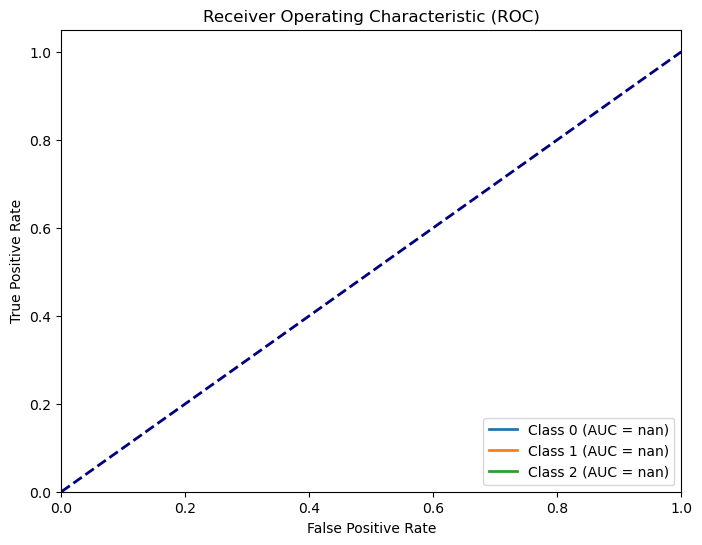

In [17]:
# Plot ROC curves
plt.figure(figsize=(8, 6))
for i in range(3):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

Q6. Interpret the decision tree by examining the splits, branches, and leaves. Identify the most important 
variables and their thresholds. Use domain knowledge and common sense to explain the patterns and 
trends. 

In [10]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [11]:
data = pd.read_csv('diabetes.csv')


In [12]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [16]:
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Fit the classifier to the training data
clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [17]:
# Calculate feature importances
feature_importances = clf.feature_importances_
print("Feature Importances:")
for feature_name, importance in zip(diabetes.feature_names, feature_importances):
    print(f"{feature_name}: {importance}")

Feature Importances:
age: 0.12541869754533624
sex: 0.03621976787767512
bmi: 0.09464248094505782
bp: 0.10865110718188954
s1: 0.13360826816882895
s2: 0.09575833771115537
s3: 0.09845815327020951
s4: 0.07928370604763815
s5: 0.1335825543316986
s6: 0.09437692692051071


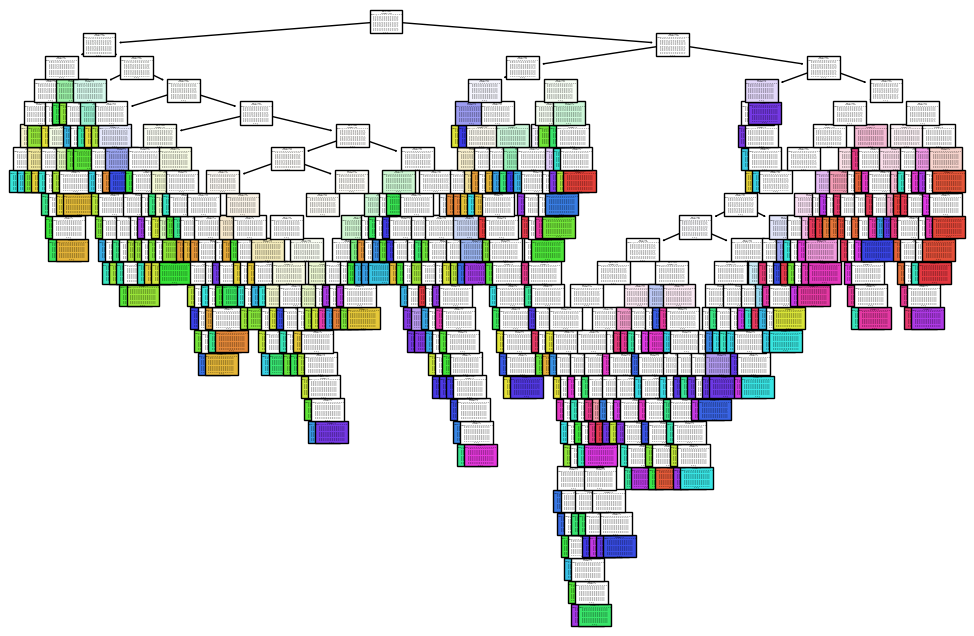

In [19]:
# Visualize the decision tree (you'll need Graphviz installed)
from sklearn.tree import plot_tree
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=diabetes.feature_names)
plt.show()

Q7. Validate the decision tree model by applying it to new data or testing its robustness to changes in the 
dataset or the environment. Use sensitivity analysis and scenario testing to explore the uncertainty and 
risks

Validating a decision tree model involves assessing its performance on new or unseen data and testing its robustness. Sensitivity analysis and scenario testing can help you explore how the model responds to changes in the dataset or environmental factors. Here's how you can do this using Python:

1. Splitting Data: First, you need to split your dataset into a training set and a test set. The training set is used to train the model, while the test set is used for validation.

2. Train the Decision Tree Model: Use the training data to train your decision tree model as shown in the previous code example.

3. Test Model Performance: Evaluate the model's performance on the test set using metrics like accuracy, precision, recall, F1-score, or ROC-AUC, depending on your specific problem (classification or regression)

In [20]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = clf.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Additional metrics and classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.00
              precision    recall  f1-score   support

        37.0       0.00      0.00      0.00       1.0
        42.0       0.00      0.00      0.00       1.0
        48.0       0.00      0.00      0.00       2.0
        49.0       0.00      0.00      0.00       0.0
        51.0       0.00      0.00      0.00       0.0
        52.0       0.00      0.00      0.00       2.0
        58.0       0.00      0.00      0.00       0.0
        59.0       0.00      0.00      0.00       0.0
        60.0       0.00      0.00      0.00       1.0
        61.0       0.00      0.00      0.00       1.0
        63.0       0.00      0.00      0.00       2.0
        64.0       0.00      0.00      0.00       1.0
        67.0       0.00      0.00      0.00       1.0
        68.0       0.00      0.00      0.00       1.0
        69.0       0.00      0.00      0.00       1.0
        70.0       0.00      0.00      0.00       1.0
        71.0       0.00      0.00      0.00       0.0
        72.0

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.

1. Sensitivity Analysis: To perform sensitivity analysis, you can perturb the input data to see how sensitive the model's predictions are to small changes in the input features. This can help you understand if the model's predictions are robust.

In [21]:
import numpy as np

# Add noise to a specific feature
noisy_X_test = X_test.copy()
feature_index_to_perturb = 0  # Change this to the index of the feature you want to perturb
noise_level = 0.1  # Adjust the noise level as needed

noisy_X_test[:, feature_index_to_perturb] += np.random.normal(0, noise_level, noisy_X_test.shape[0])

# Evaluate model on perturbed data
y_pred_noisy = clf.predict(noisy_X_test)

# Compare predictions on noisy data with original data
accuracy_noisy = accuracy_score(y_test, y_pred_noisy)
print(f"Accuracy with noise: {accuracy_noisy:.2f}")


Accuracy with noise: 0.00


Scenario Testing: Scenario testing involves assessing how the model performs under different conditions or scenarios. For example, you can simulate changes in the environment or the dataset and observe how the model reacts.

In [22]:
missing_X_test = X_test.copy()
missing_X_test[:10, feature_index_to_perturb] = np.nan

# Impute missing values (e.g., using mean imputation)
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
missing_X_test = imputer.fit_transform(missing_X_test)

# Evaluate model on data with missing values
y_pred_missing = clf.predict(missing_X_test)
accuracy_missing = accuracy_score(y_test, y_pred_missing)
print(f"Accuracy with missing values: {accuracy_missing:.2f}")

# Scenario 2: Change the distribution of a feature
altered_X_test = X_test.copy()
altered_X_test[:, feature_index_to_perturb] = np.random.uniform(low=0, high=1, size=altered_X_test.shape[0])

# Evaluate model on altered data
y_pred_altered = clf.predict(altered_X_test)
accuracy_altered = accuracy_score(y_test, y_pred_altered)
print(f"Accuracy with altered feature distribution: {accuracy_altered:.2f}")

Accuracy with missing values: 0.00
Accuracy with altered feature distribution: 0.00
